###### Import Libraries

In [1339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import timeit
import warnings
warnings.filterwarnings('ignore')


###### Load Dataset

In [1340]:
start = timeit.default_timer()
pd.pandas.set_option('display.max_columns',None)
df=pd.read_excel (r'E:\Data Trained_ Training\used_cars1.xlsx')
stop = timeit.default_timer()
print(stop - start)

0.10277219999989029


###### Dimension of Dataset

In [1341]:
df.shape

(224, 14)

Observation :
In this dataset there are 1120 rows and 14 columns

###### Sample of Dataset

In [1342]:
df.head()

,site,Brand,Model,Location,Make Year,Reg year,Feul,Km Driven,Engine Displacement,No of Owners,RTO,Transmission,Insurance Type,Price
0,www.cardekho.com,Hyundai,I20 Sportz 1.2,Mumbai,['2015'],['Jun 2015'],['Petrol'],"['17,819 Kms']",['1197 cc'],['1st Owner'],['MH04'],['Manual'],['Third Party insurance'],"5,34,000"
1,www.cardekho.com,Ford,Figo 1.5d Titanium Mt,Mumbai,['2016'],['Dec 2016'],['Diesel'],"['62,791 Kms']",['1498 cc'],['1st Owner'],['MH02'],['Manual'],['Third Party insurance'],"4,90,000"
2,www.cardekho.com,Hyundai,I20 Asta 1.2,Mumbai,['2014'],['Feb 2015'],['Petrol'],"['60,600 Kms']",['1197 cc'],['2nd Owner'],[],[],[],"4,85,000"
3,www.cardekho.com,Maruti,Swift Dzire Amt Vdi,Mumbai,['2017'],['Dec 2017'],['Diesel'],"['46,351 Kms']",['1248 cc'],['1st Owner'],['MH03'],['Automatic'],['Not Available'],"7,37,500"
4,www.cardekho.com,Hyundai,I10 Magna 1.1l,Mumbai,['2011'],['Feb 2012'],['Petrol'],"['50,121 Kms']",['1086 cc'],['1st Owner'],['MH02'],['Manual'],['Third Party insurance'],"2,47,500"


###### Breif Infomation About Data

In [1343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   site                 224 non-null    object
 1   Brand                224 non-null    object
 2   Model                224 non-null    object
 3   Location             157 non-null    object
 4   Make Year            224 non-null    object
 5   Reg year             224 non-null    object
 6   Feul                 224 non-null    object
 7   Km Driven            157 non-null    object
 8   Engine Displacement  157 non-null    object
 9   No of Owners         157 non-null    object
 10  RTO                  157 non-null    object
 11  Transmission         224 non-null    object
 12  Insurance Type       224 non-null    object
 13  Price                157 non-null    object
dtypes: object(14)
memory usage: 24.6+ KB


Observation :
In this dataset there are all 14 columns are object type and
every column not have 1120 non null value so there are Nan value

###### Statistical Summary of Data

In [1344]:
#for numerical variable

In [1345]:
#df.describe(exclude='object')

In [1346]:
#for Categorical variable

In [1347]:
df.describe(include=[object])

,site,Brand,Model,Location,Make Year,Reg year,Feul,Km Driven,Engine Displacement,No of Owners,RTO,Transmission,Insurance Type,Price
count,224,224,224,157,224,224,224,157,157,157,157,224,224,157
unique,1,12,91,9,11,68,5,110,27,2,48,4,4,104
top,www.cardekho.com,Maruti,details,Noida,N,a,['Petrol'],"['82,299 Kms']",['1197 cc'],['1st Owner'],[],['Manual'],['Third Party insurance'],"4,69,500"
freq,224,68,67,46,67,67,97,4,48,142,15,123,129,5


###### check for unique values in columns

In [1348]:
#pd.pandas.set_option('display.max_rows',None)
df.nunique()

site                     1
Brand                   12
Model                   91
Location                 9
Make Year               11
Reg year                68
Feul                     5
Km Driven              110
Engine Displacement     27
No of Owners             2
RTO                     48
Transmission             4
Insurance Type           4
Price                  104
dtype: int64

Observation :<br>
Brand,Location, Make Year,Feul,No of Owners, Transmission,Insurance Type columns have less than 20 unique values thats why its categorical variables. Model, Reg year, Km Driven, Engine Displacement,Price columns have more than 20 unique values that why it is countinuous  variables

###### check for missing values in columns

In [1349]:
df.isnull().sum()

site                    0
Brand                   0
Model                   0
Location               67
Make Year               0
Reg year                0
Feul                    0
Km Driven              67
Engine Displacement    67
No of Owners           67
RTO                    67
Transmission            0
Insurance Type          0
Price                  67
dtype: int64

In [1350]:
df.isnull().sum().sum()

402

Observation :
some columns have missing values

###### total % missing values in columns

In [1351]:
pd.pandas.set_option('display.max_rows',None)
print("Total % of MIssing Values in Columns :")
df.isnull().sum()/df.shape[0]*100 

Total % of MIssing Values in Columns :


site                    0.000000
Brand                   0.000000
Model                   0.000000
Location               29.910714
Make Year               0.000000
Reg year                0.000000
Feul                    0.000000
Km Driven              29.910714
Engine Displacement    29.910714
No of Owners           29.910714
RTO                    29.910714
Transmission            0.000000
Insurance Type          0.000000
Price                  29.910714
dtype: float64

 Observation: Km Driven, Engine Displacement, No of Owners, RTO, Transmission, Insurance Type, Price columns have more than 20 % missing values.

###### check for duplicate rows

In [1352]:
sum(df.duplicated())

113

Observation :
There are duplicate values

###### check for zeros in columns

In [1353]:
print(df[df==0].count())

site                   0
Brand                  0
Model                  0
Location               0
Make Year              0
Reg year               0
Feul                   0
Km Driven              0
Engine Displacement    0
No of Owners           0
RTO                    0
Transmission           0
Insurance Type         0
Price                  0
dtype: int64


In [1354]:
#% of Zero as values

In [1355]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


site                   0.0
Brand                  0.0
Model                  0.0
Location               0.0
Make Year              0.0
Reg year               0.0
Feul                   0.0
Km Driven              0.0
Engine Displacement    0.0
No of Owners           0.0
RTO                    0.0
Transmission           0.0
Insurance Type         0.0
Price                  0.0
dtype: float64

Observation :
No Zero as value

###### Identification of variables

In [1356]:
#numerical variables

In [1357]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  0


In [1358]:
#categorical variable

In [1359]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  14


In [1360]:
#---Binary variable

In [1361]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in numerical_features]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 1


In [1362]:
##--- for nominal variable

In [1363]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 13


In [1364]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Brand and number of numerical are 12
The feature is Model and number of numerical are 91
The feature is Location and number of numerical are 10
The feature is Make Year and number of numerical are 11
The feature is Reg year and number of numerical are 68
The feature is Feul and number of numerical are 5
The feature is Km Driven and number of numerical are 111
The feature is Engine Displacement and number of numerical are 28
The feature is No of Owners and number of numerical are 3
The feature is RTO and number of numerical are 49
The feature is Transmission and number of numerical are 4
The feature is Insurance Type and number of numerical are 4
The feature is Price and number of numerical are 105


Observation :
In this dataset there are all Categorical variable (Nominal)

###### check for cardinality for Categorical variable

Text(0.5, 1.0, 'Cardinality')

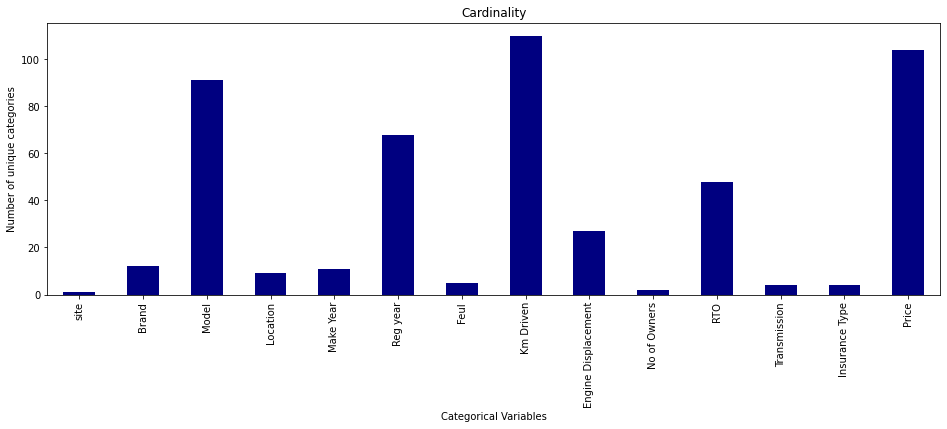

In [1365]:
df[categorical_features].nunique().plot.bar(figsize=(16,5),color='navy')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

Observation :
Model, Reg Year, Km Driven, Price columns have max high cardinality. RTO, Engine Displacement have medium Cardinality.
rest have less cardinality.

###### check for outliers

In [1366]:
#fig, pltcan=plt.subplots(nrows =len(numerical_features),ncols =1, figsize=(14,18))
#red_color=dict(markerfacecolor='white',markeredgecolor='blue',marker='o')
#for predcol , i in zip(numerical_features, range(len(numerical_features))):
#    df.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)

###### check for skewness

In [1367]:
print(df.skew())
#df.skew().plot(kind='barh',colormap='Pastel2',figsize=(15,7))

Series([], dtype: float64)


Observation :<br>
no skewness

###### Identify Target and Feature Variable

Prediction-predicte about  price of Car

Targe Variable(Depaendent Features)- Price<br>
Predictors(Independent Features)- All variables

###### Univariate Analysis

In [1368]:
#binary variable

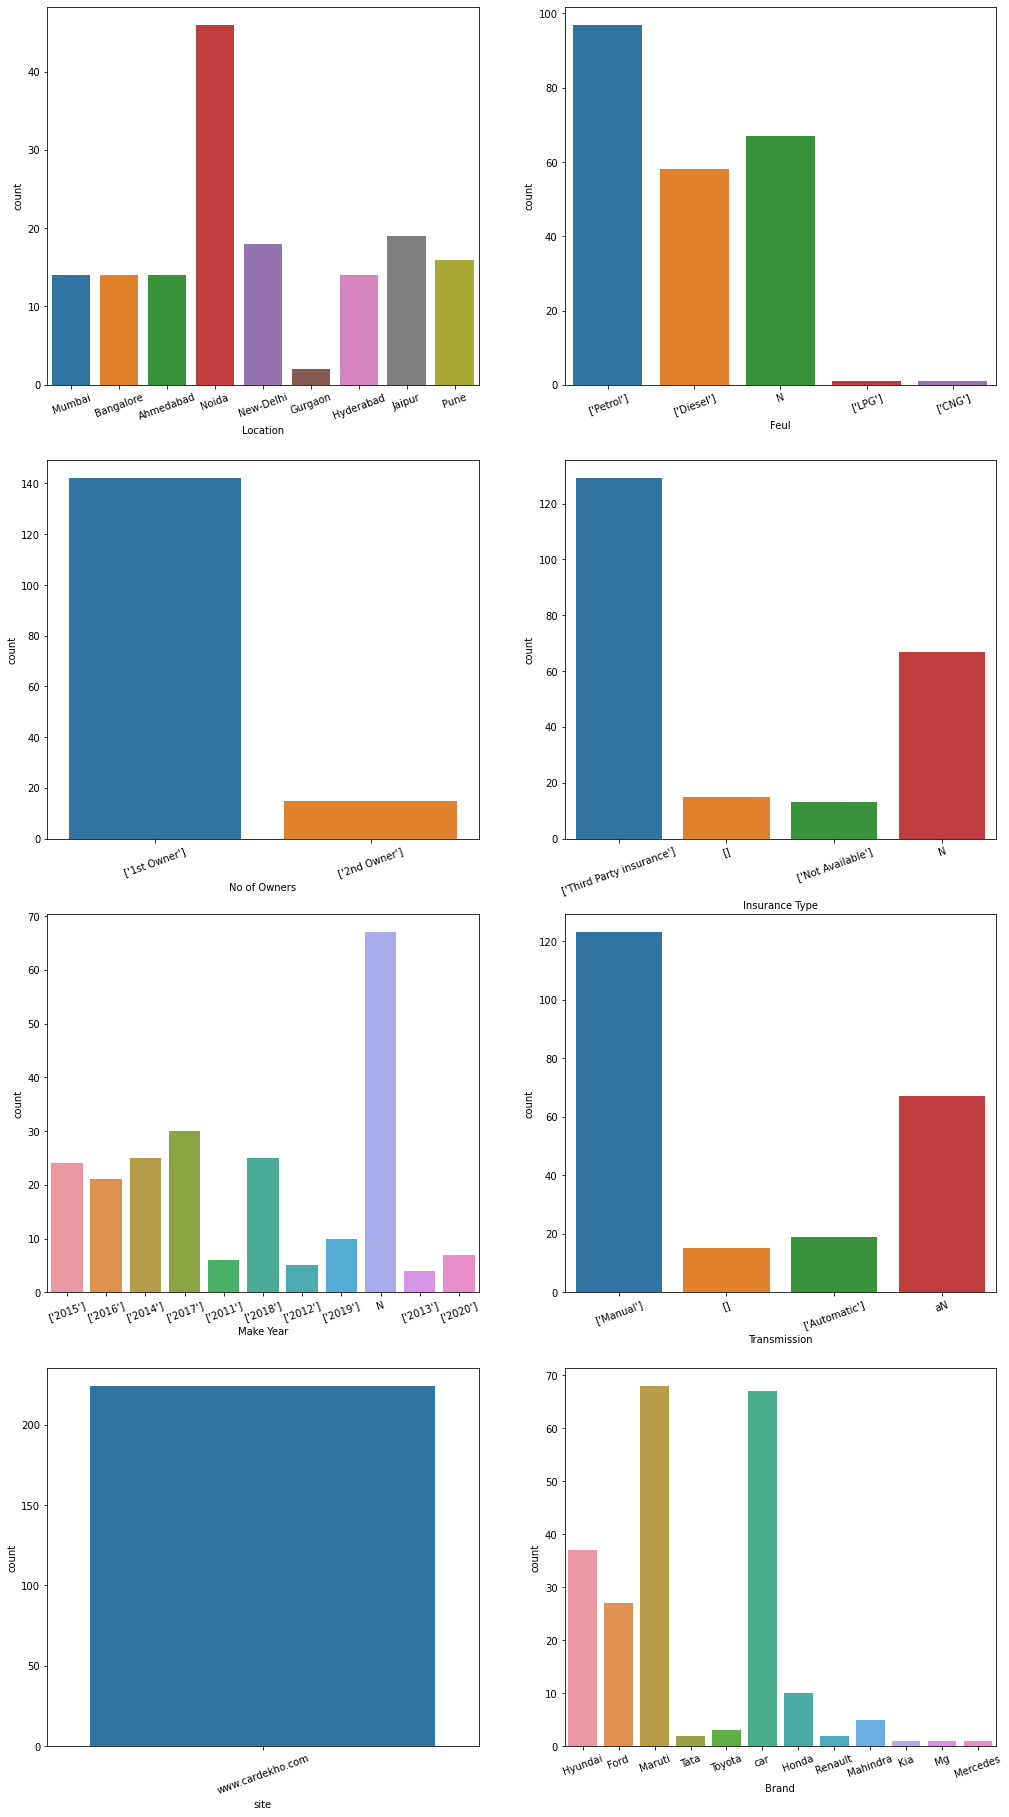

In [1258]:
f1=['Location','Feul','No of Owners','Insurance Type','Make Year','Transmission','site','Brand']
plt.figure(figsize=(17,32))
for i in enumerate(f1):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(i[1],data=df)
    plt.xticks(rotation=20)

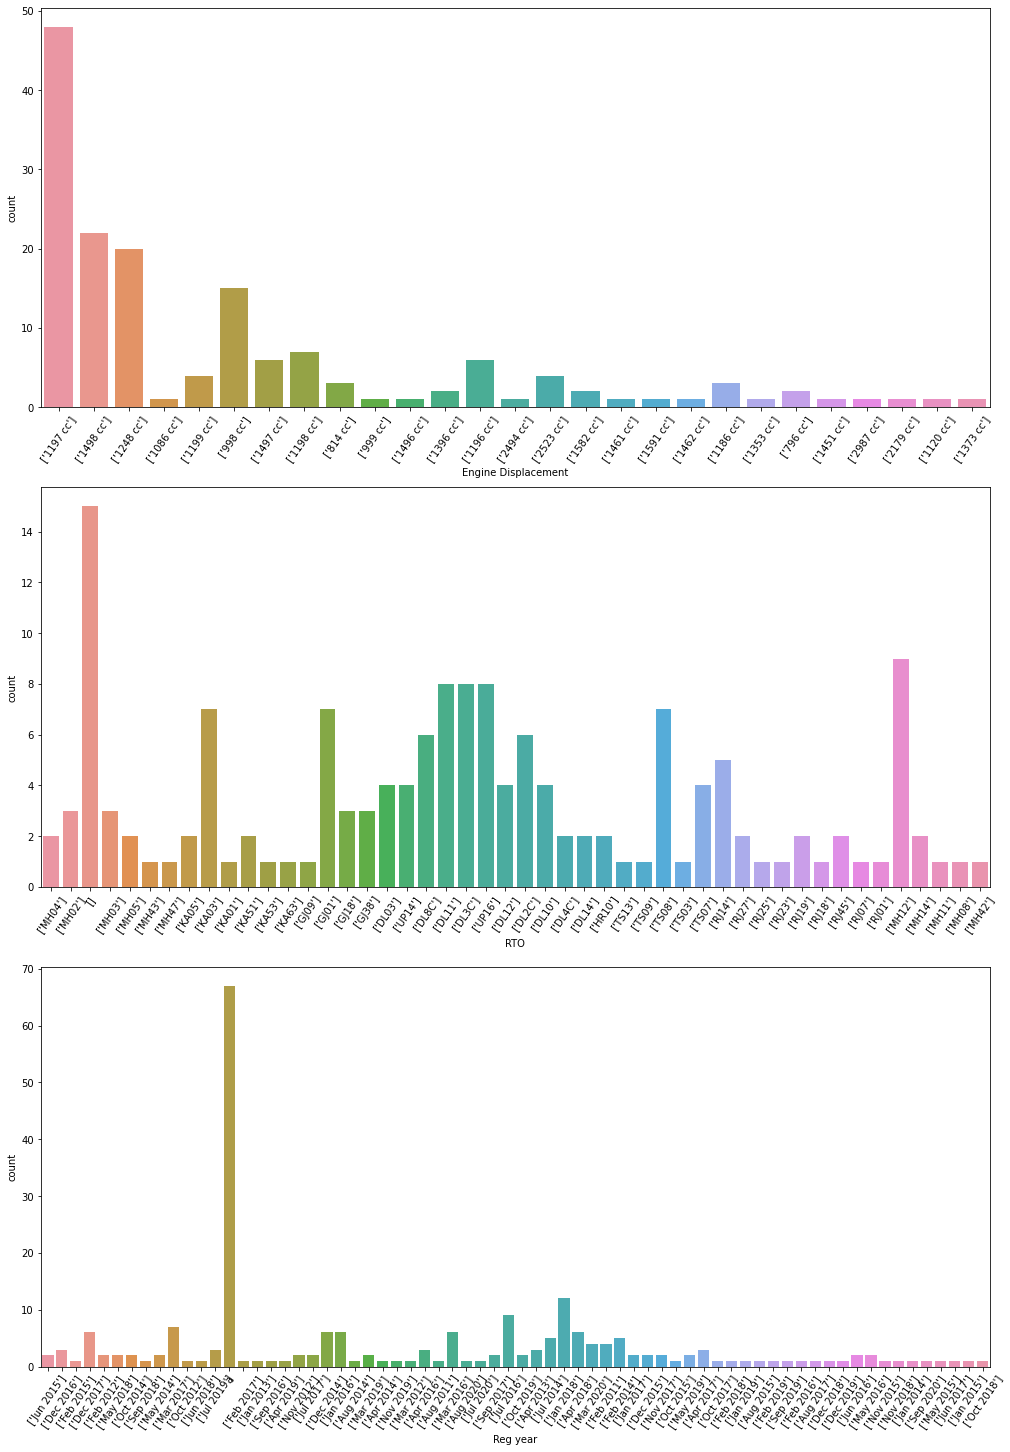

In [1259]:
f2=['Engine Displacement','RTO','Reg year']
plt.figure(figsize=(17,25))
for i in enumerate(f2):
    plt.subplot(3,1,i[0]+1)
    sns.countplot(i[1],data=df)
    plt.xticks(rotation=55)

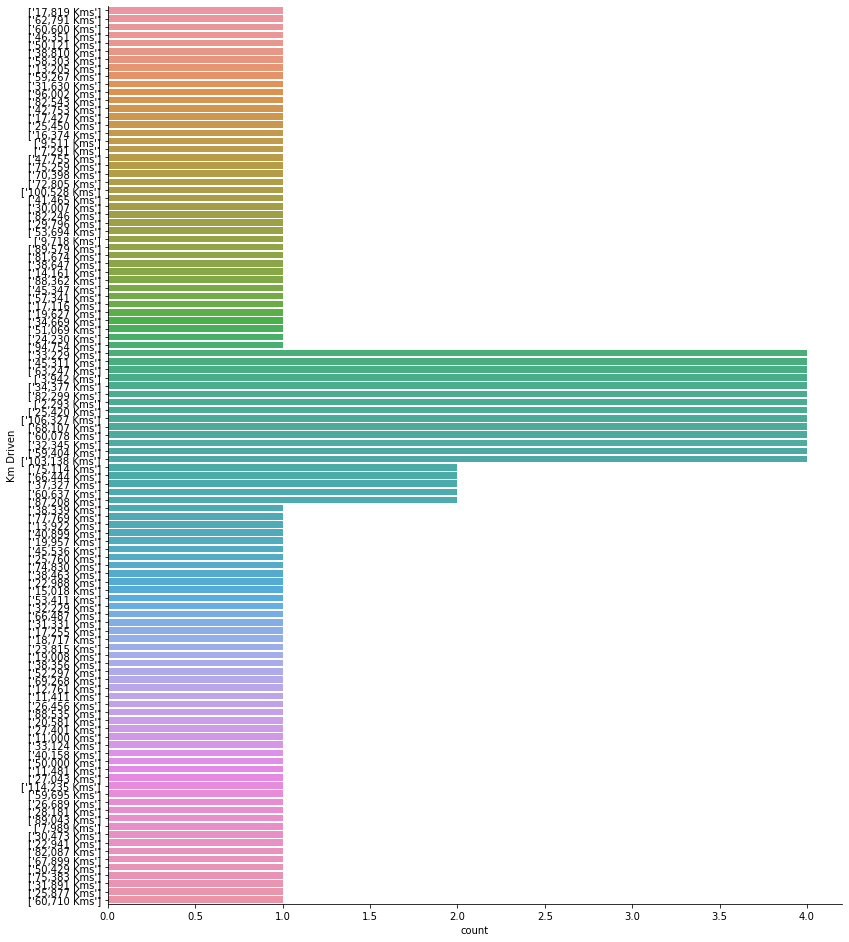

In [1260]:
sns.catplot(y='Km Driven', kind='count', data=df,height=13, aspect=.9)

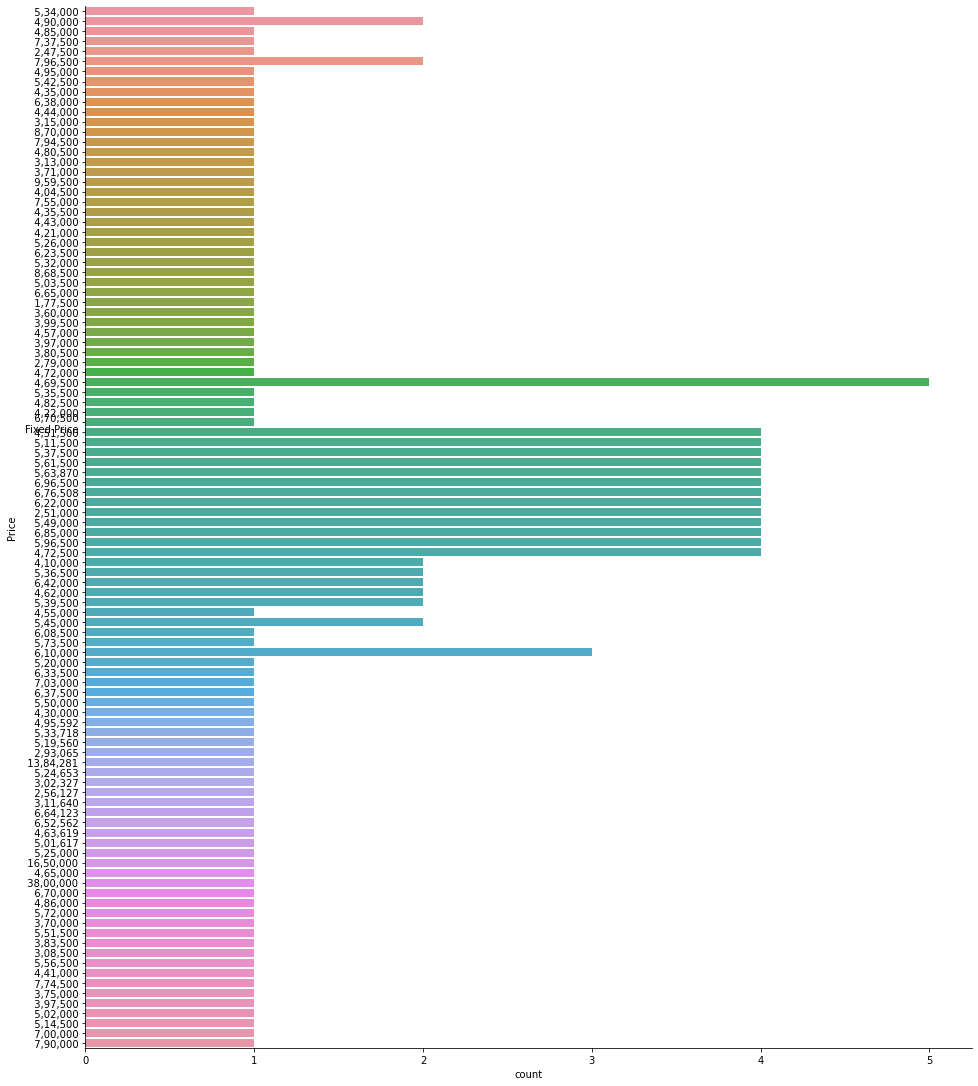

In [1261]:
sns.catplot(y='Price', kind='count', data=df,height=15, aspect=.9)

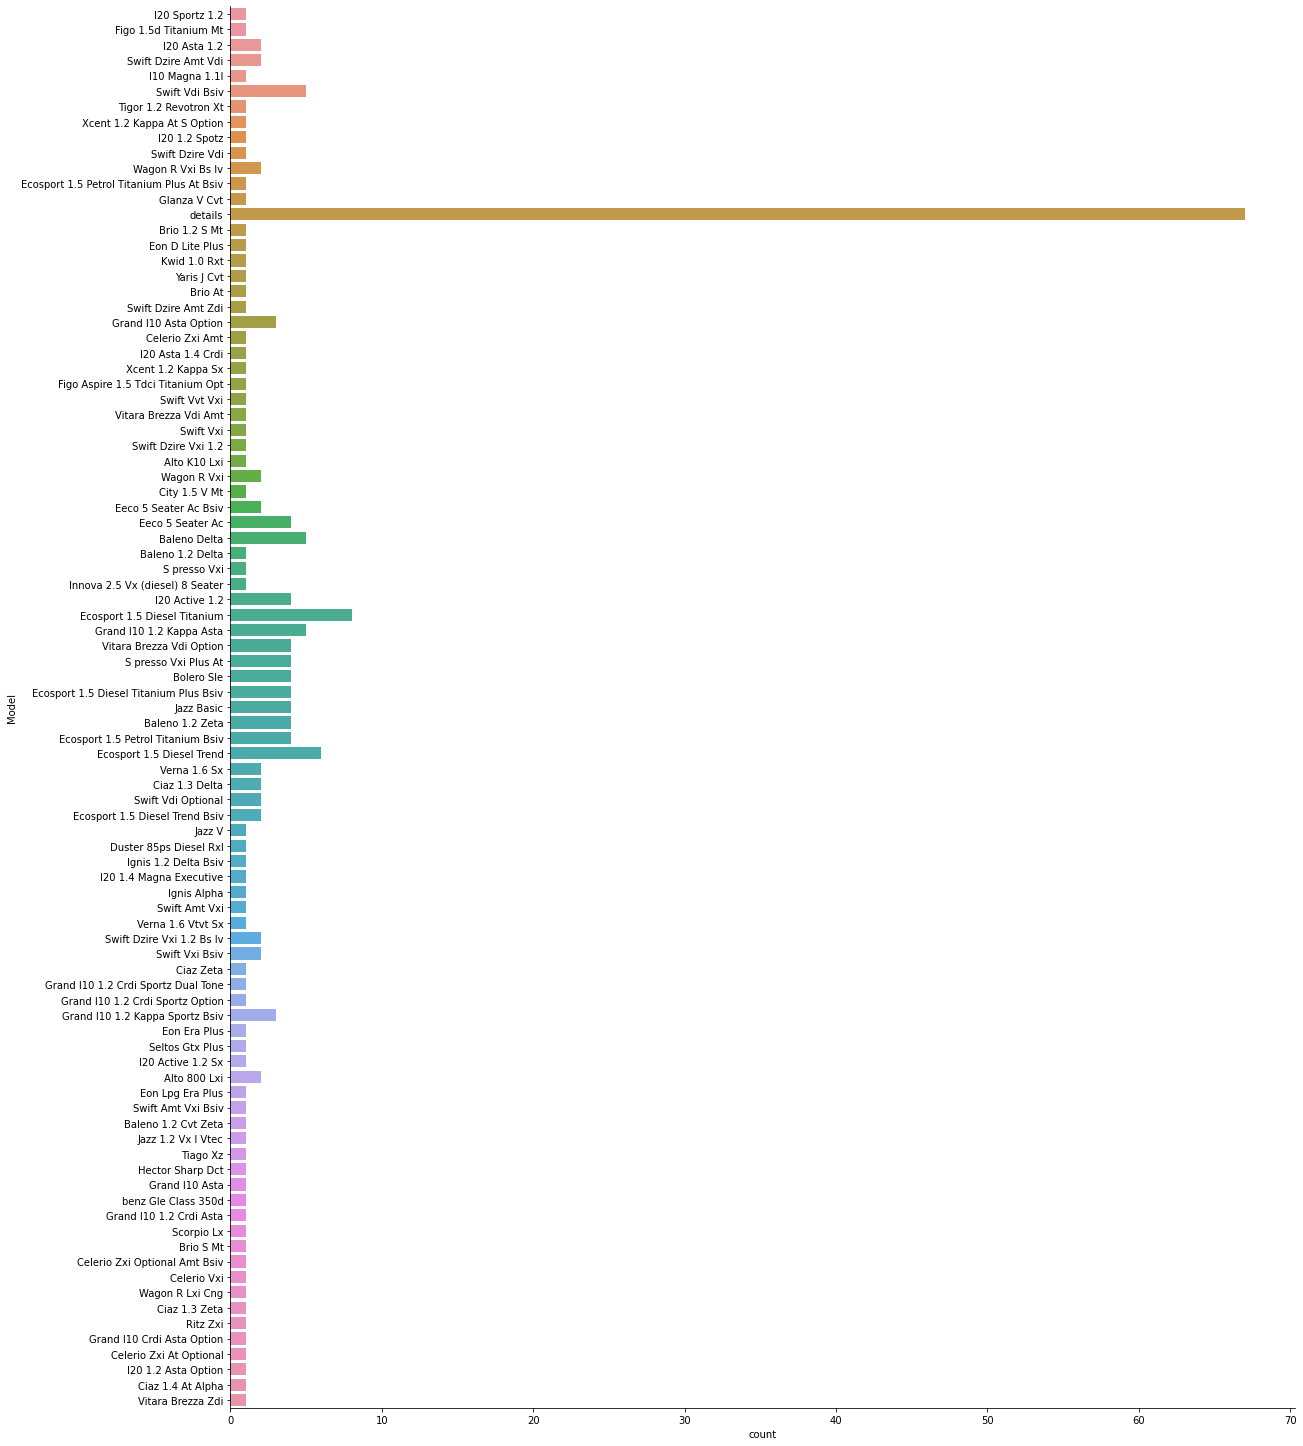

In [1262]:
sns.catplot(y='Model', kind='count', data=df,height=20, aspect=.9)

###### Bivariate Analysis

###### Price vs Categorical Variable

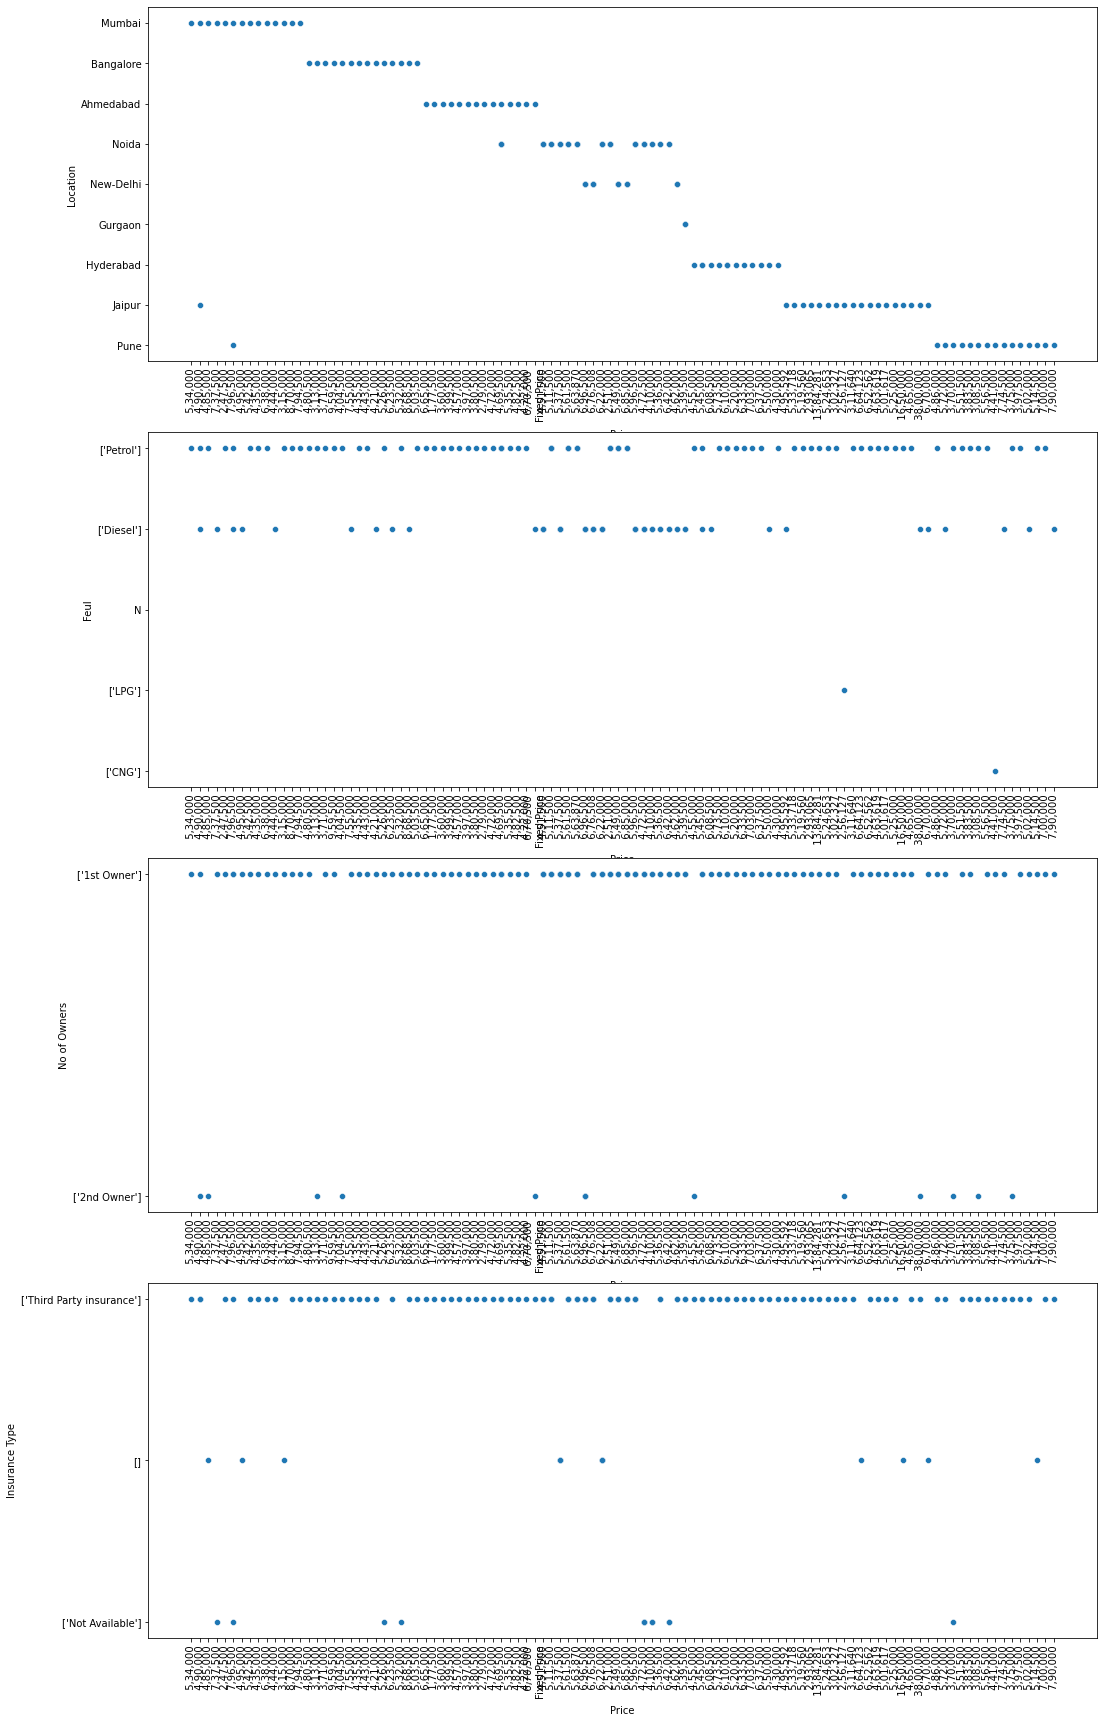

In [1263]:
d1=f1=['Location','Feul','No of Owners','Insurance Type']
plt.figure(figsize=(17,30))
for i in enumerate(d1):
    plt.subplot(4,1,i[0]+1)
    sns.scatterplot(y=i[1],x='Price',data=df)
    plt.xticks(rotation=90)

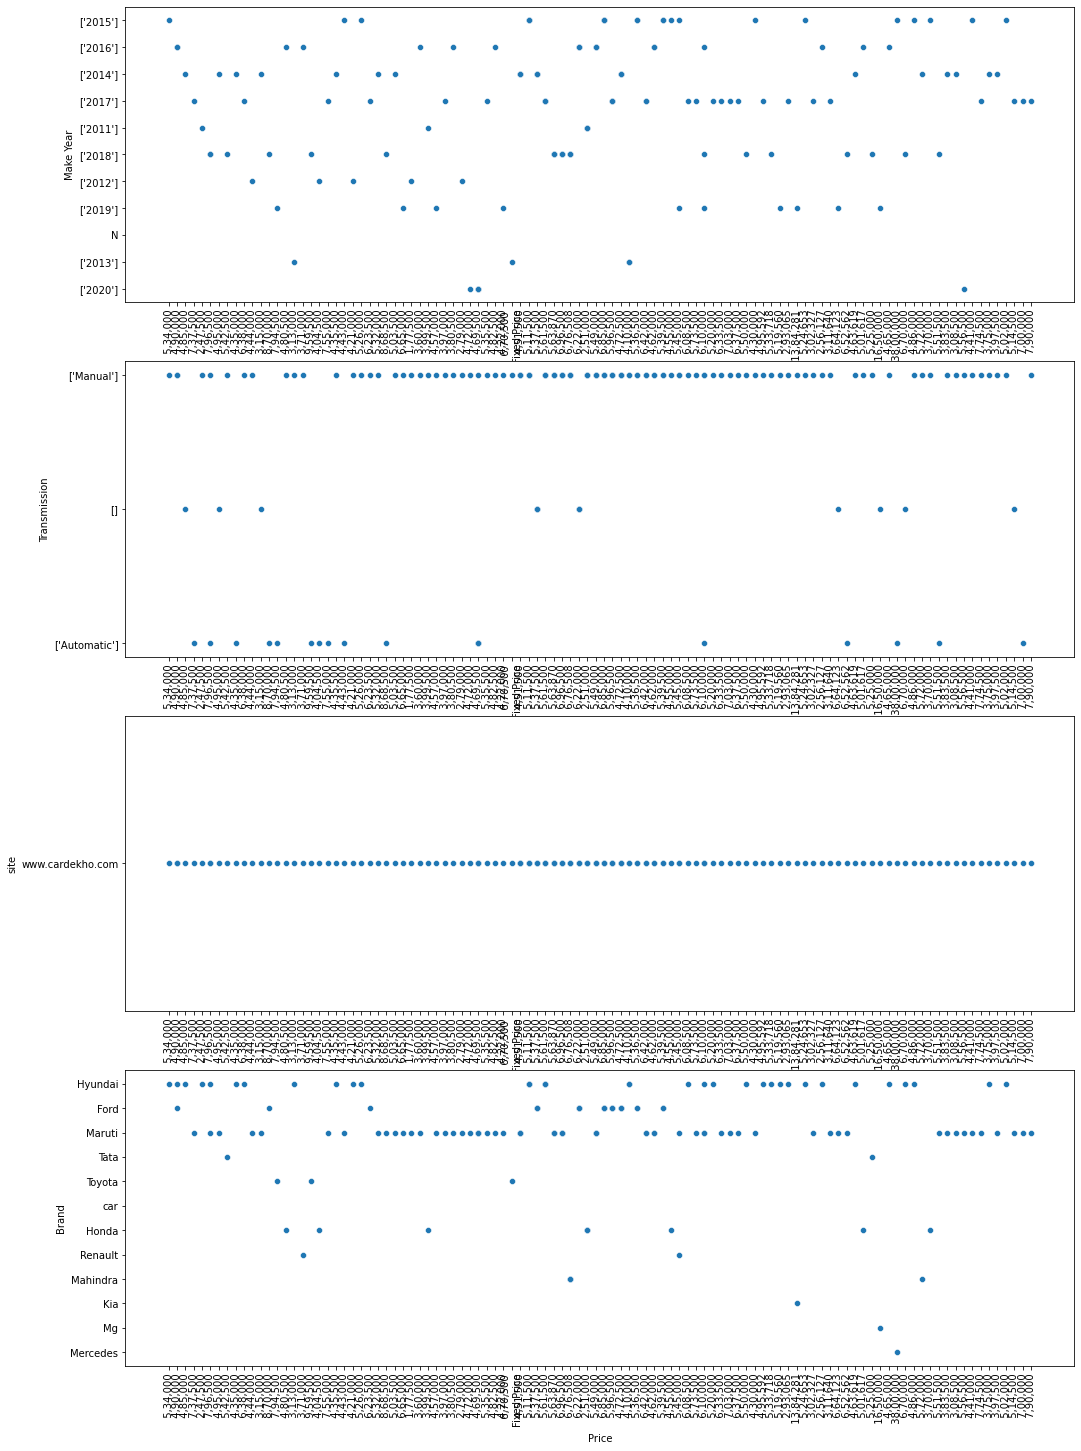

In [1264]:
d1=f1=['Make Year','Transmission','site','Brand']
plt.figure(figsize=(17,25))
for i in enumerate(d1):
    plt.subplot(4,1,i[0]+1)
    sns.scatterplot(y=i[1],x='Price',data=df)
    plt.xticks(rotation=90)

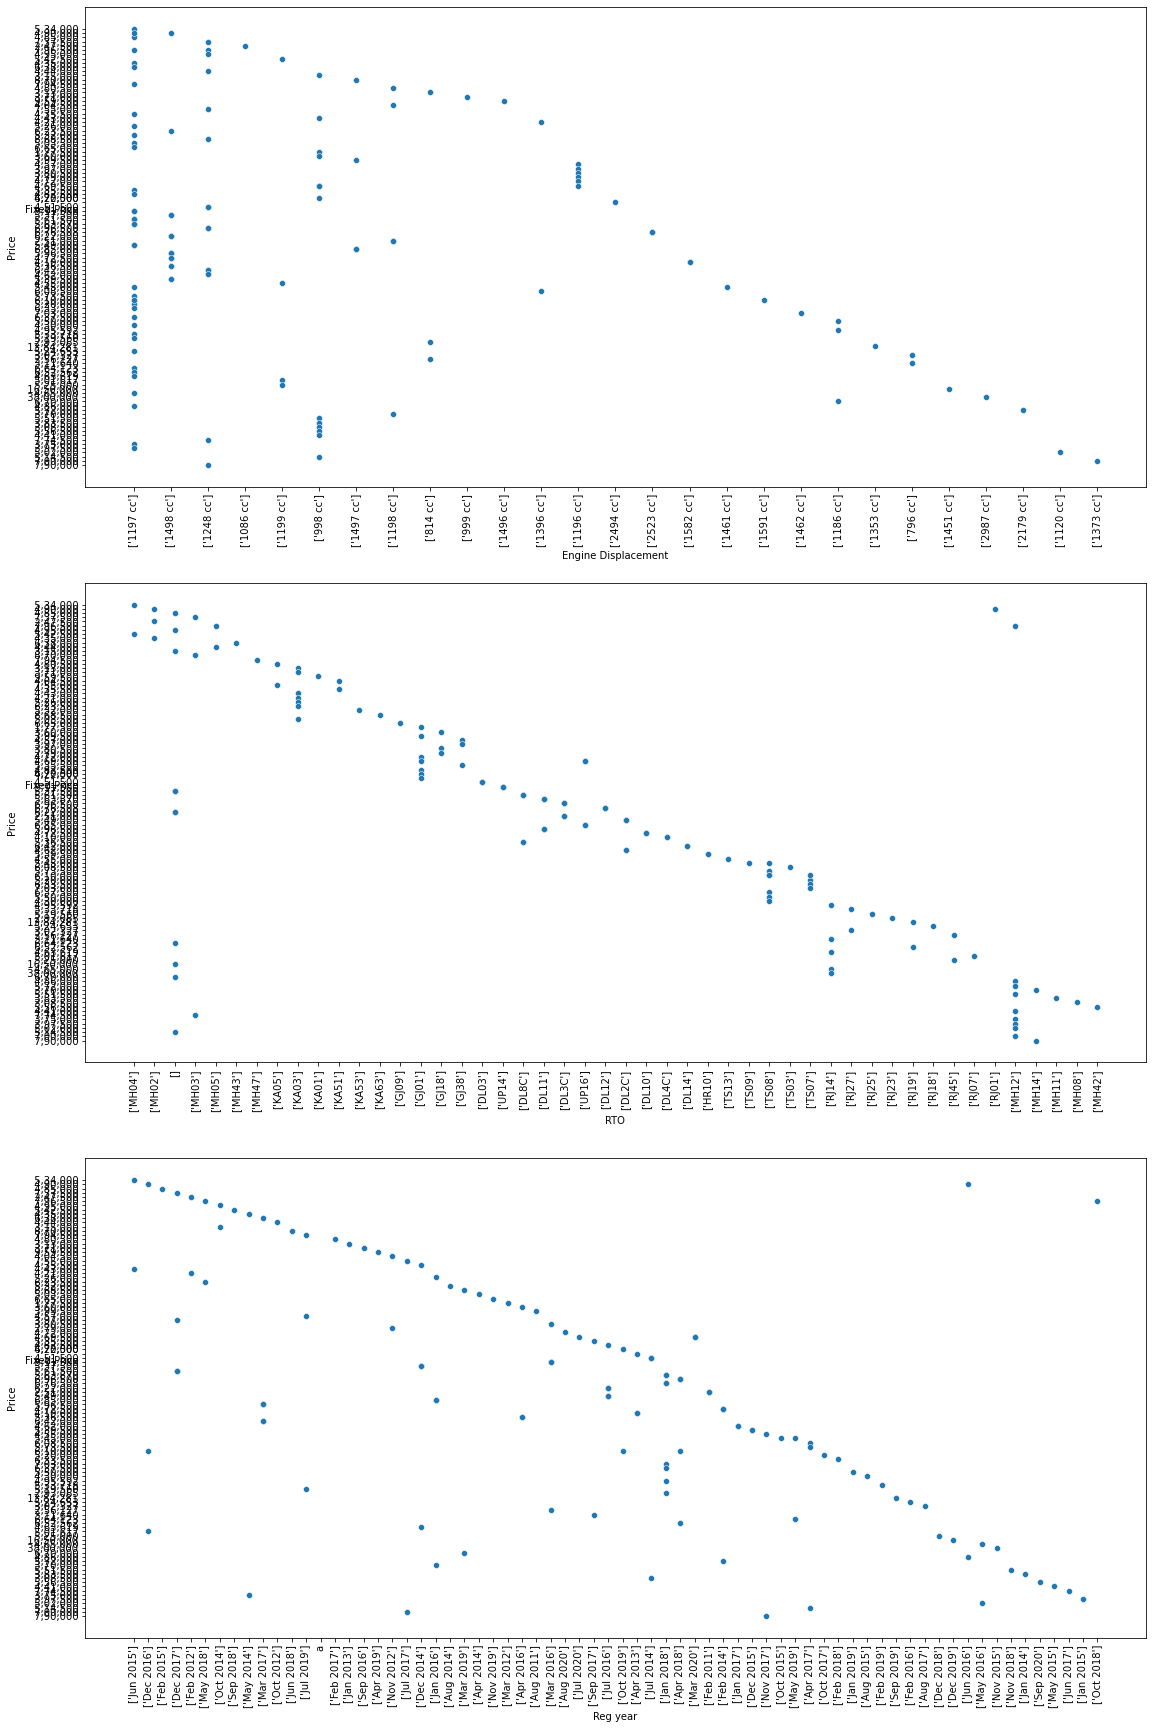

In [1265]:
d1=['Engine Displacement','RTO','Reg year']
plt.figure(figsize=(19,30))
for i in enumerate(d1):
    plt.subplot(3,1,i[0]+1)
    sns.scatterplot(x=i[1],y='Price',data=df)
    plt.xticks(rotation=90)

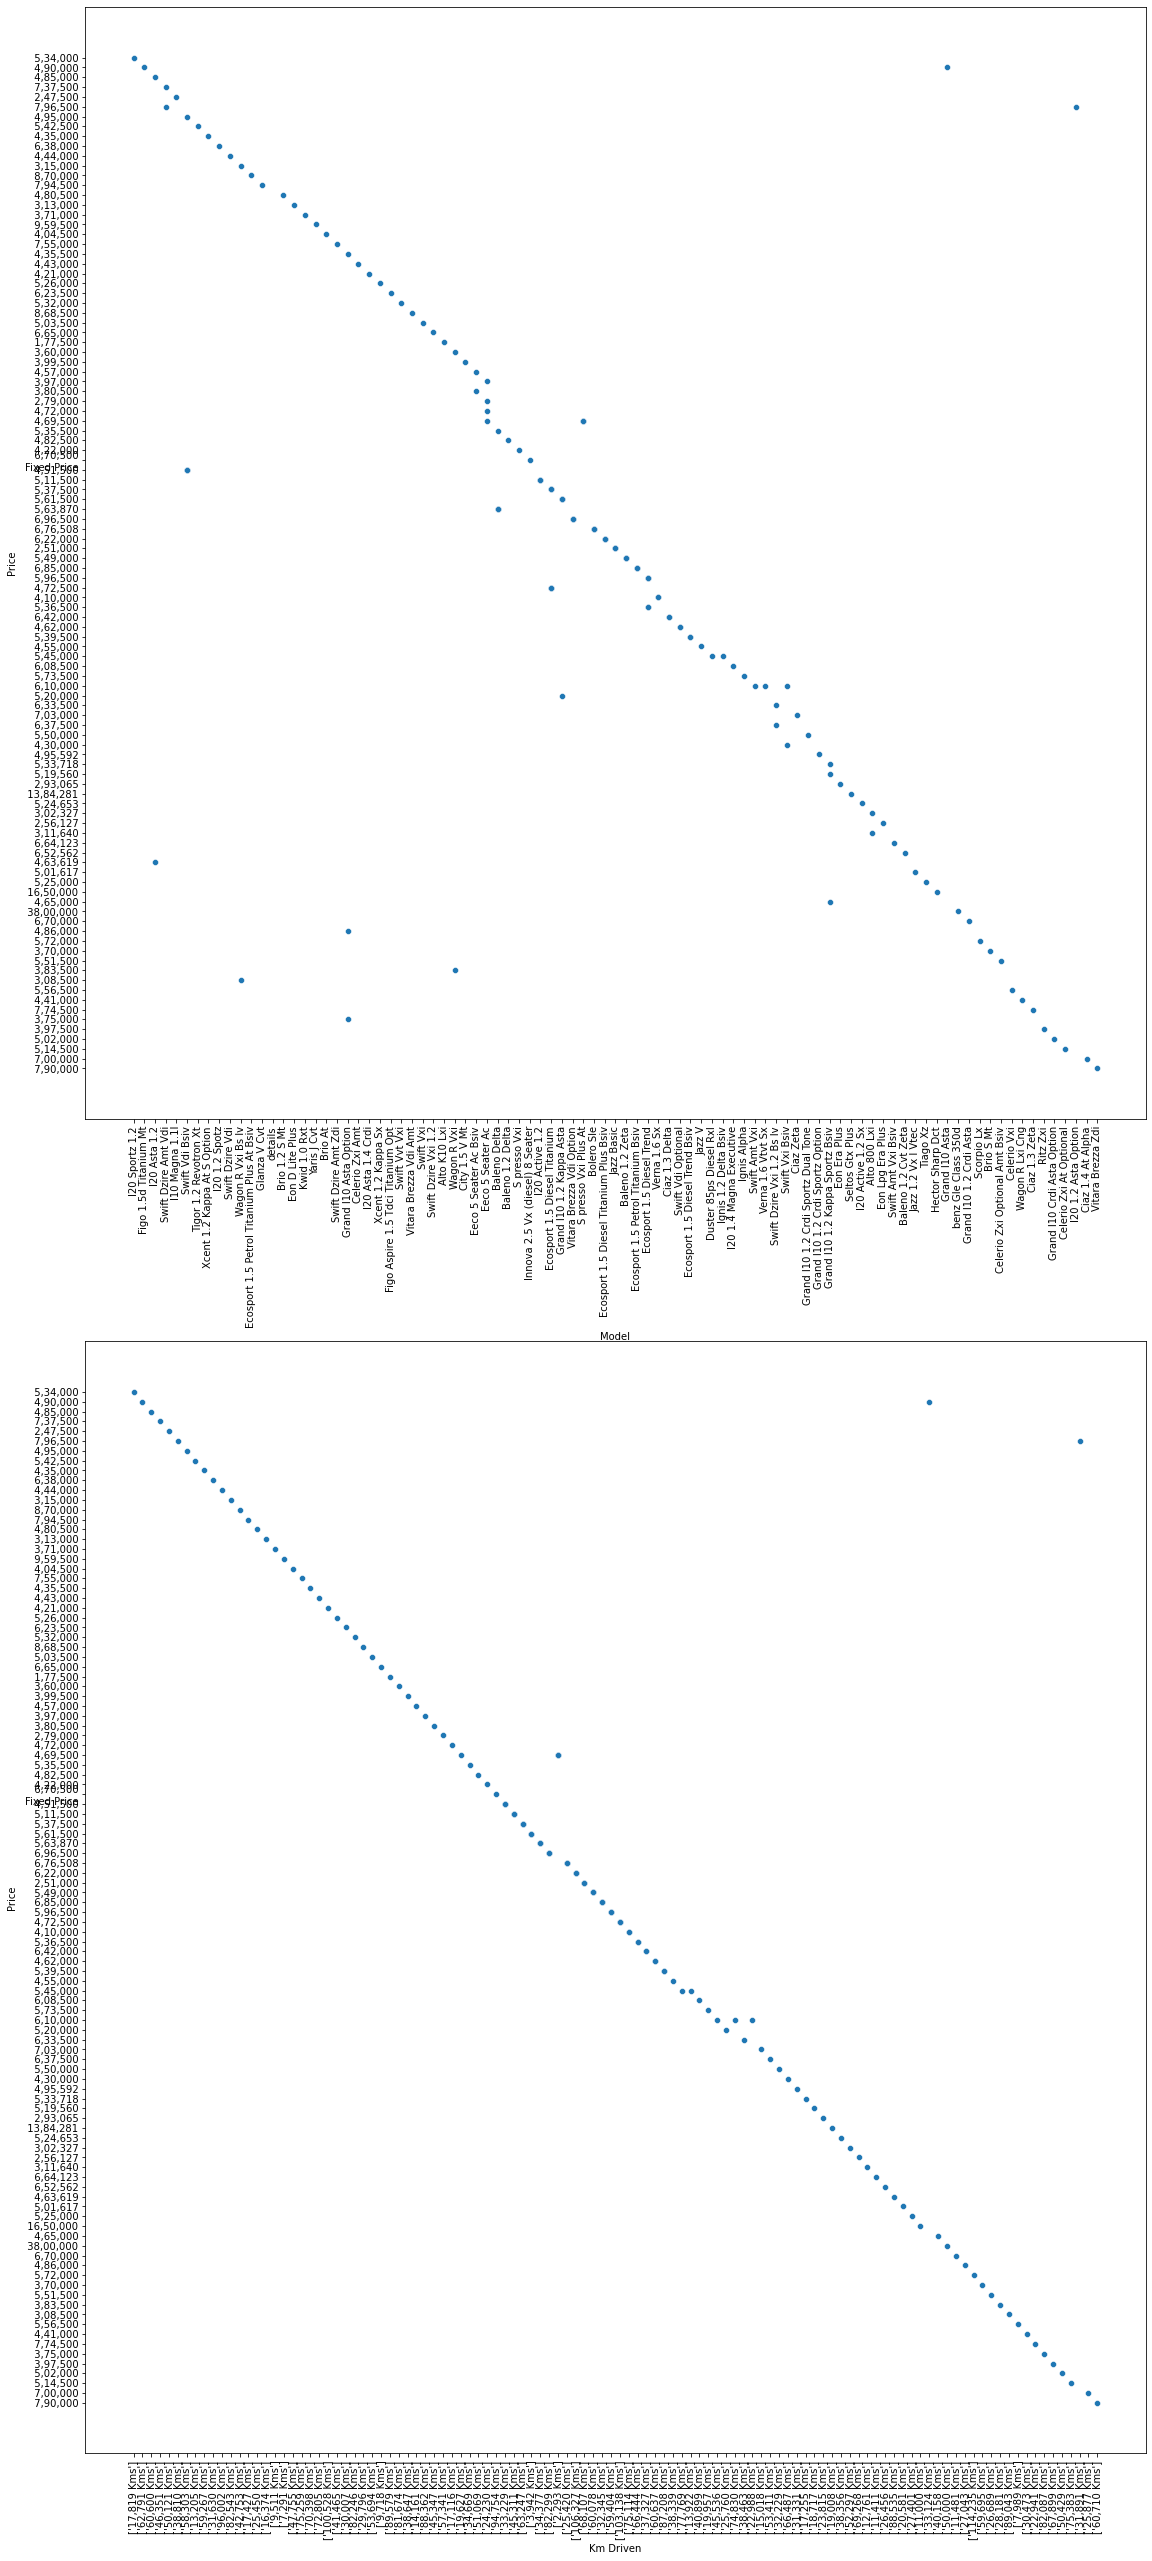

In [1266]:
d1=['Model','Km Driven']
plt.figure(figsize=(19,45))
for i in enumerate(d1):
    plt.subplot(2,1,i[0]+1)
    sns.scatterplot(x=i[1],y='Price',data=df)
    plt.xticks(rotation=90)

###### Handling MIssing Values / Encoding Variables

In [1369]:
df.head()

,site,Brand,Model,Location,Make Year,Reg year,Feul,Km Driven,Engine Displacement,No of Owners,RTO,Transmission,Insurance Type,Price
0,www.cardekho.com,Hyundai,I20 Sportz 1.2,Mumbai,['2015'],['Jun 2015'],['Petrol'],"['17,819 Kms']",['1197 cc'],['1st Owner'],['MH04'],['Manual'],['Third Party insurance'],"5,34,000"
1,www.cardekho.com,Ford,Figo 1.5d Titanium Mt,Mumbai,['2016'],['Dec 2016'],['Diesel'],"['62,791 Kms']",['1498 cc'],['1st Owner'],['MH02'],['Manual'],['Third Party insurance'],"4,90,000"
2,www.cardekho.com,Hyundai,I20 Asta 1.2,Mumbai,['2014'],['Feb 2015'],['Petrol'],"['60,600 Kms']",['1197 cc'],['2nd Owner'],[],[],[],"4,85,000"
3,www.cardekho.com,Maruti,Swift Dzire Amt Vdi,Mumbai,['2017'],['Dec 2017'],['Diesel'],"['46,351 Kms']",['1248 cc'],['1st Owner'],['MH03'],['Automatic'],['Not Available'],"7,37,500"
4,www.cardekho.com,Hyundai,I10 Magna 1.1l,Mumbai,['2011'],['Feb 2012'],['Petrol'],"['50,121 Kms']",['1086 cc'],['1st Owner'],['MH02'],['Manual'],['Third Party insurance'],"2,47,500"


In [1370]:
df=df.drop_duplicates()

#df= df.dropna(how='all')
df= df.drop(14)

In [1371]:
df['Make Year']=df['Make Year'].str.slice(2,6)
df['Reg year1']=df['Reg year'].str.slice(2,6)
df['Reg year2']=df['Reg year'].str.slice(6,10)
df['Km Driven']=df['Km Driven'].str.slice(2,8)
df['Engine Displacement']=df['Engine Displacement'].str.slice(2,6)

df.drop(["site","RTO","Reg year"],inplace=True,axis=1)

df['No of Owners']=df['No of Owners'].replace(np.nan,"['1st Owner']")
df['Feul']=df['Feul'].replace('N',"['Petrol']")
df['Insurance Type']=df['Feul'].replace(['N','[]'],"['Not Available']")

df['Transmission']=df['Feul'].replace(['aN','[]'],"['Manual']")


In [1372]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['No of Owners']=le.fit_transform(df['No of Owners'])
df['Feul']=le.fit_transform(df['Feul'])
df['Insurance Type']=le.fit_transform(df['Insurance Type'])
df['Transmission']=le.fit_transform(df['Transmission'])

df['Brand']=le.fit_transform(df['Brand'])
df['Model']=le.fit_transform(df['Model'])
df['Location']=le.fit_transform(df['Location'])
df['Reg year1']=le.fit_transform(df['Reg year1'])


In [1373]:
df[['Km Driven']]=df['Km Driven'].str.replace(',','')
df[['Km Driven']]=pd.to_numeric(df['Km Driven']).round(0)
df[['Reg year2']]=pd.to_numeric(df['Reg year2']).round(0)
df[['Engine Displacement']]=pd.to_numeric(df['Engine Displacement']).round(0)

df[['Price']]=df['Price'].str.replace(',','')
df[['Price']]=df['Price'].str.replace('Fixed Price','')
df[['Price']]=pd.to_numeric(df['Price']).round(0)

df[['Make Year']]=pd.to_numeric(df['Make Year']).round(0)


In [1374]:
df.head()

,Brand,Model,Location,Make Year,Feul,Km Driven,Engine Displacement,No of Owners,Transmission,Insurance Type,Price,Reg year1,Reg year2
0,2,51,5,2015,3,17819,1197,0,3,3,534000,6,2015
1,0,31,5,2016,1,62791,1498,0,1,1,490000,2,2016
2,2,49,5,2014,3,60600,1197,1,3,3,485000,3,2015
3,5,66,5,2017,1,46351,1248,0,1,1,737500,2,2017
4,2,43,5,2011,3,50121,1086,0,3,3,247500,3,2012


In [1375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 205
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Brand                110 non-null    int32
 1   Model                110 non-null    int32
 2   Location             110 non-null    int32
 3   Make Year            110 non-null    int64
 4   Feul                 110 non-null    int32
 5   Km Driven            110 non-null    int64
 6   Engine Displacement  110 non-null    int64
 7   No of Owners         110 non-null    int32
 8   Transmission         110 non-null    int32
 9   Insurance Type       110 non-null    int32
 10  Price                110 non-null    int64
 11  Reg year1            110 non-null    int32
 12  Reg year2            110 non-null    int64
dtypes: int32(8), int64(5)
memory usage: 8.6 KB


###### split target and feature variables

In [1376]:
y_train=df[['Price']]
X_train=df.drop(['Price'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (110, 1)
X_train : (110, 12)


In [1377]:
cor = df.corr()
ctarget = abs(cor['Price'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('\nweak correlated :',result2)

strong correlated : ['Model', 'Make Year', 'Engine Displacement', 'Price', 'Reg year2']

weak correlated : ['Brand', 'Location', 'Feul', 'Km Driven', 'No of Owners', 'Transmission', 'Insurance Type', 'Reg year1']


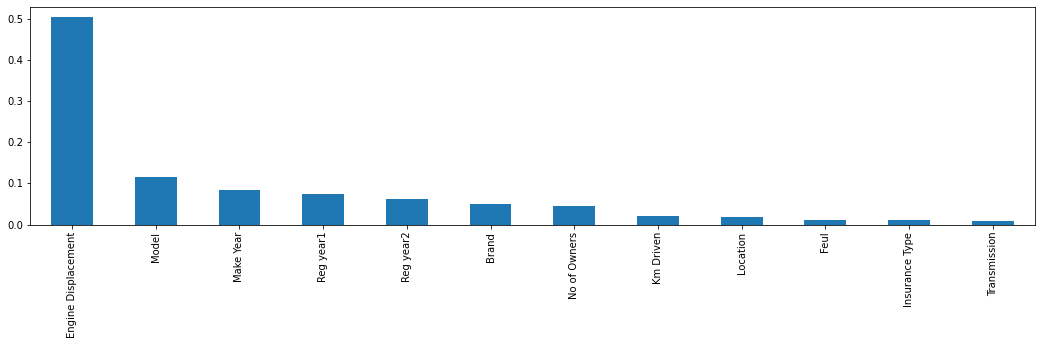

In [1378]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
#print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(80).plot(kind='bar',figsize=(18,4))
plt.show()

In [1379]:
X_train.drop(['Insurance Type','Transmission'],inplace=True,axis=1)

In [1380]:
X_train.columns

Index(['Brand', 'Model', 'Location', 'Make Year', 'Feul', 'Km Driven',
       'Engine Displacement', 'No of Owners', 'Reg year1', 'Reg year2'],
      dtype='object')

In [1381]:
y_train.columns

Index(['Price'], dtype='object')

###### Splitting data into Independent Features and Dependent Features

In [1382]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.35, random_state = 76)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(71, 10)
(71, 1)
(39, 10)
(39, 1)


###### Normilization of data

In [1383]:
from sklearn.preprocessing import power_transform
X=power_transform(X_train,method='yeo-johnson')
X

array([[-0.68606925,  0.3457383 ,  0.3791683 , ..., -0.34992711,
         0.36893533, -0.63168888],
       [-1.85506795, -0.40567055,  0.3791683 , ..., -0.34992711,
        -0.88376185, -0.17300486],
       [-0.68606925,  0.27499472,  0.3791683 , ...,  2.85773803,
        -0.53349003, -0.63168888],
       ...,
       [-0.68606925,  0.09439888,  1.38745174, ..., -0.34992711,
         1.38138654,  0.7765071 ],
       [ 0.60501248, -1.06690222,  1.38745174, ..., -0.34992711,
         0.08659239,  0.29631343],
       [ 0.60501248,  1.35948725,  1.38745174, ..., -0.34992711,
         1.14232946,  0.29631343]])

###### Standardization

In [1384]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[ 0.13500427 -1.50178942  0.74220289  0.88507914 -1.51759222 -0.60674253
   3.81377164 -0.33071891 -0.3849389   0.74787509]
 [ 0.59144728 -1.08199789 -0.43756738  0.38235419  0.63738873 -1.02578548
   0.58899634 -0.33071891 -0.3849389   0.74787509]
 [ 0.13500427  0.6353311   1.52871641 -1.12582067 -1.51759222 -1.1706095
   2.76822715 -0.33071891 -0.68861293 -1.21875941]
 [ 0.59144728  0.78798256  0.34894614  0.38235419 -1.51759222  0.23645956
  -0.06142959 -0.33071891 -0.99228695  0.25621647]
 [-0.77788175 -0.16608909  1.52871641 -0.62309572 -1.51759222  0.40074115
  -0.4504694  -0.33071891  0.82975719 -0.23544216]
 [ 0.59144728  0.59716823  1.13545965  1.89052905  0.63738873 -1.53841013
  -0.82127297 -0.33071891  0.52608317  1.73119235]
 [ 0.59144728 -1.34913795  1.52871641  1.89052905  0.63738873 -1.30894765
  -0.82127297 -0.33071891  1.74077927  1.73119235]
 [-0.77788175 -0.39506629 -0.43756738  0.88507914 -1.51759222 -0.33244302
  -0.24987075 -0.33071891 -0.3849389   1.23953372]
 

###### Model Building

In [1385]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

LinearRegression() -Actual vs Predicted


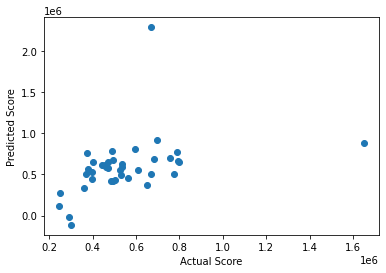

Lasso() -Actual vs Predicted


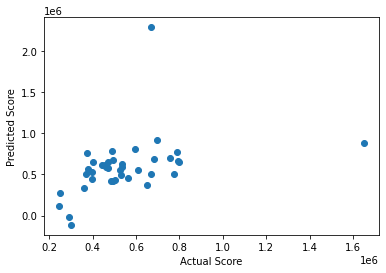

LassoCV() -Actual vs Predicted


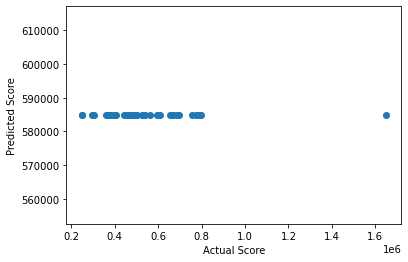

Ridge() -Actual vs Predicted


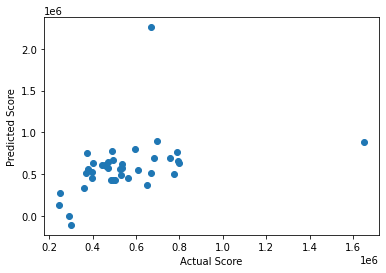

RidgeCV(alphas=array([ 0.1,  1. , 10. ])) -Actual vs Predicted


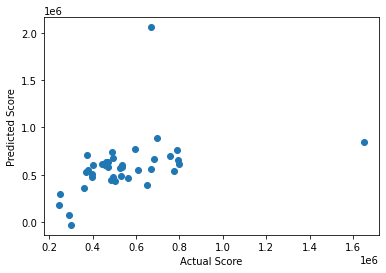

DecisionTreeRegressor() -Actual vs Predicted


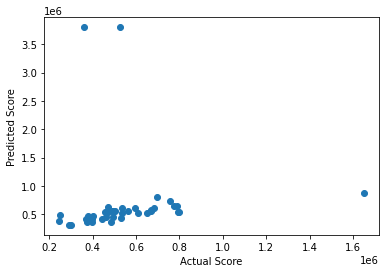

KNeighborsRegressor() -Actual vs Predicted


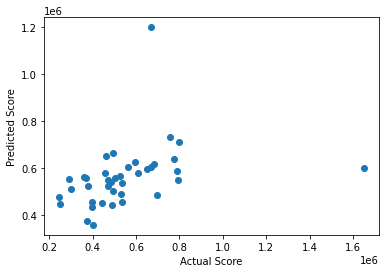

RandomForestRegressor() -Actual vs Predicted


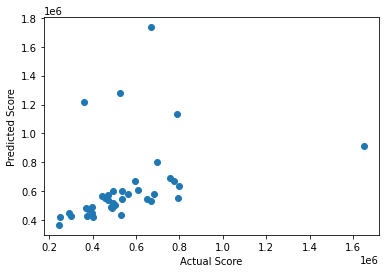

GradientBoostingRegressor() -Actual vs Predicted


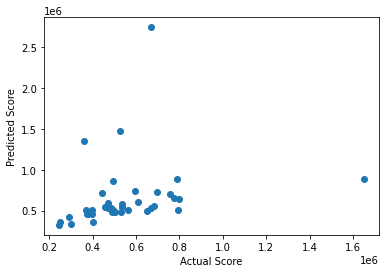

AdaBoostRegressor() -Actual vs Predicted


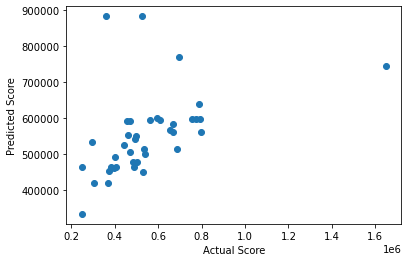

In [1387]:
models=[]
model1 = []

Z = [LinearRegression(), Lasso(), LassoCV() ,Ridge(), RidgeCV() ,DecisionTreeRegressor(),
     KNeighborsRegressor() ,RandomForestRegressor() , GradientBoostingRegressor(),AdaBoostRegressor()] 
X = ["LinearRegression", "Lasso", "LassoCV" ,"Ridge", "RidgeCV" ,"DecisionTreeRegressor",
     "KNeighborsRegressor" ,"RandomForestRegressor" ,"GradientBoostingRegressor" ,"AdaBoostRegressor"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    model1.append(pred)
    plt.scatter(y_test,pred)
    plt.xlabel('Actual Score')
    plt.ylabel('Predicted Score')
    print(model,'-Actual vs Predicted')
    plt.show()

LinearRegression() -Actual vs Predicted


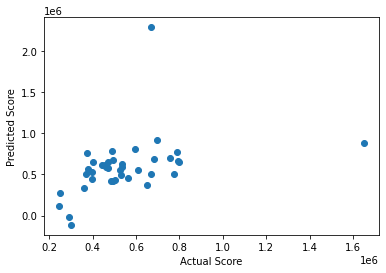

Lasso() -Actual vs Predicted


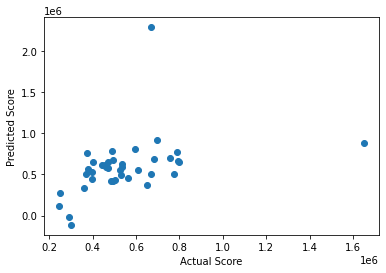

LassoCV() -Actual vs Predicted


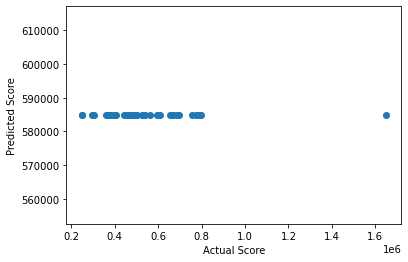

Ridge() -Actual vs Predicted


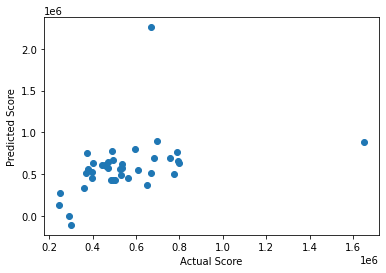

RidgeCV(alphas=array([ 0.1,  1. , 10. ])) -Actual vs Predicted


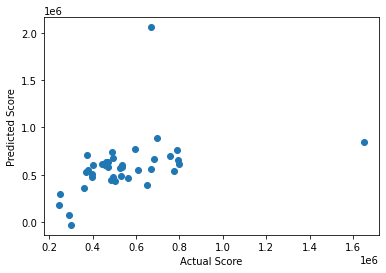

DecisionTreeRegressor() -Actual vs Predicted


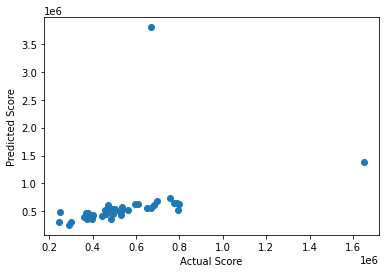

KNeighborsRegressor() -Actual vs Predicted


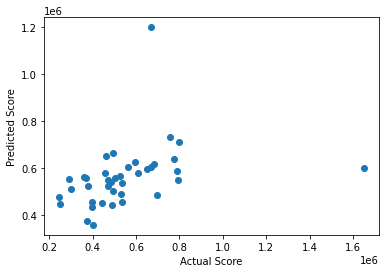

RandomForestRegressor() -Actual vs Predicted


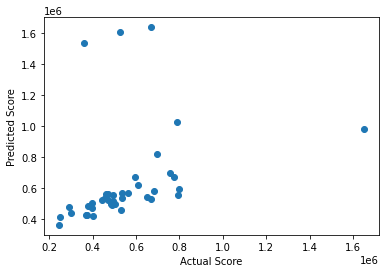

GradientBoostingRegressor() -Actual vs Predicted


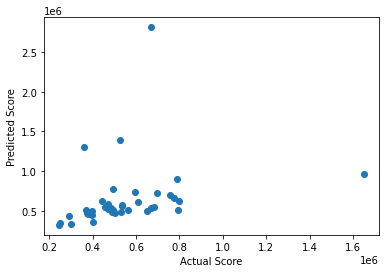

AdaBoostRegressor() -Actual vs Predicted


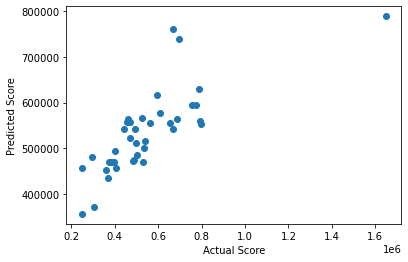

In [1388]:
models=[]
models1 = []

Z = [LinearRegression(), Lasso(), LassoCV() ,Ridge(), RidgeCV() ,DecisionTreeRegressor(),
     KNeighborsRegressor() ,RandomForestRegressor() , GradientBoostingRegressor(),AdaBoostRegressor()] 
X = ["LinearRegression", "Lasso", "LassoCV" ,"Ridge", "RidgeCV" ,"DecisionTreeRegressor",
     "KNeighborsRegressor" ,"RandomForestRegressor" ,"GradientBoostingRegressor" ,"AdaBoostRegressor"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    models.append(y_test)
    models1.append(pred)
    plt.scatter(y_test,pred)
    plt.xlabel('Actual Score')
    plt.ylabel('Predicted Score')
    print(model,'-Actual vs Predicted')
    plt.show()

###### Evaluation

In [1390]:
#Evaluation
models2=[]
models3 = []
models6=[]
models7=[]
models8=[]

Z = [LinearRegression(), Lasso(), LassoCV() ,Ridge(), RidgeCV() ,DecisionTreeRegressor(),
     KNeighborsRegressor() ,RandomForestRegressor() , GradientBoostingRegressor(),AdaBoostRegressor()] 
X = ["LinearRegression", "Lasso", "LassoCV" ,"Ridge", "RidgeCV" ,"DecisionTreeRegressor",
     "KNeighborsRegressor" ,"RandomForestRegressor" ,"GradientBoostingRegressor" ,"AdaBoostRegressor"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    print(model)
    r2_score_train =model.score(x_train, y_train)
    models2.append(r2_score_train)
    print('r2 Score On Train Data:',r2_score_train)
    r2_score_test=model.score(x_test,y_test)
    models3.append(r2_score_test)
    print('r2 Score On Test Data:',r2_score_test)
    models8.append(metrics.mean_absolute_error(y_test, pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
    models6.append(metrics.mean_squared_error(y_test, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
    models7.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)),"\n")
   

LinearRegression()
r2 Score On Train Data: 0.6491904256435254
r2 Score On Test Data: -1.0494286130243413
Mean Absolute Error: 198483.66246488524
Mean Squared Error: 111709786834.52737
Root Mean Squared Error: 334230.14052375255 

Lasso()
r2 Score On Train Data: 0.6491904250651472
r2 Score On Test Data: -1.04937565511739
Mean Absolute Error: 198480.30510129622
Mean Squared Error: 111706900217.02866
Root Mean Squared Error: 334225.82218767697 

LassoCV()
r2 Score On Train Data: 0.0
r2 Score On Test Data: -0.0242375913406081
Mean Absolute Error: 166528.68833513904
Mean Squared Error: 55828908735.55406
Root Mean Squared Error: 236281.41851519782 

Ridge()
r2 Score On Train Data: 0.6487993173317972
r2 Score On Test Data: -0.9847462322671634
Mean Absolute Error: 195323.01601604134
Mean Squared Error: 108184094394.97897
Root Mean Squared Error: 328913.50594796037 

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
r2 Score On Train Data: 0.6365672136283032
r2 Score On Test Data: -0.6260820478617604
M

###### Validation

In [1391]:
#validation
models4=[]
models5 = []

Z = [LinearRegression(), Lasso(), LassoCV() ,Ridge(), RidgeCV() ,DecisionTreeRegressor(),
     KNeighborsRegressor() ,RandomForestRegressor() , GradientBoostingRegressor(),AdaBoostRegressor()] 
X = ["LinearRegression", "Lasso", "LassoCV" ,"Ridge", "RidgeCV" ,"DecisionTreeRegressor",
     "KNeighborsRegressor" ,"RandomForestRegressor" ,"GradientBoostingRegressor" ,"AdaBoostRegressor"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    print(model)
    scores = cross_val_score(model,x_train, y_train, cv=5)
    print('Cross Validation')
    models4.append(scores)
    print(model,' Score:',scores)
    models4.append(round(scores.mean(),3))
    print('Average ',model, 'score:',round(scores.mean(),3),"\n")

LinearRegression()
Cross Validation
LinearRegression()  Score: [-39.84519374  -0.85179694  -2.10548465  -0.78278568   0.08291395]
Average  LinearRegression() score: -8.7 

Lasso()
Cross Validation
Lasso()  Score: [-39.84447345  -0.85176608  -2.10538215  -0.7827576    0.08292398]
Average  Lasso() score: -8.7 

LassoCV()
Cross Validation
LassoCV()  Score: [-3.95890259e+01 -8.74290347e-01 -7.64075107e-01 -2.40889364e-04
  4.82721628e-02]
Average  LassoCV() score: -8.236 

Ridge()
Cross Validation
Ridge()  Score: [-36.94903481  -0.79494896  -1.991195    -0.71706577   0.0849631 ]
Average  Ridge() score: -8.073 

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
Cross Validation
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))  Score: [-39.49027282  -0.45180436  -1.43830735  -0.30310065   0.0513639 ]
Average  RidgeCV(alphas=array([ 0.1,  1. , 10. ])) score: -8.326 

DecisionTreeRegressor()
Cross Validation
DecisionTreeRegressor()  Score: [-8.36158183e+01  3.97019944e-01  1.39053172e-02 -2.24989539e+01
 -8.

In [1392]:
algorithms = {
    'DecisionTreeRegressor' : {
        'model' : DecisionTreeRegressor(),
        'param' : {
            'criterion' : ['mse','friedman_mse','mae','poisson'],
            'splitter' : ['best','random'],
            'max_depth' : [2,4,6,8,10,12],
            'min_samples_split' : [0.0, 1.0],
            'min_samples_leaf' : [1,0.5],
            'min_weight_fraction_leaf' : [0, 0.5],
            'max_features' : ['auto','sqrt','log2'],
            'ccp_alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'max_leaf_nodes' : [4,6,12,10,25,50]
        }
    },
    'LogisticRegression' : {
        'model' : LinearRegression(),
        'param' : {
            'fit_intercept' : [True,False],
            'normalize' : [True,False],
            'copy_X' : [True,False],
            'positive' : [True,False],
            'n_jobs' : [1,5,10, 100,200,500]
         }
    },
    'Lasso' : {
        'model' : Lasso(),
        'param' : {
            'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.009, 10.006, 2.00, 5000.09],
            'fit_intercept' : [True,False],
            'normalize' : [True,False],
            'precompute' : [True,False],
            'copy_X' : [True,False],
            'max_iter' : [10, 50,5,90, 200, 110, 500, 1000],
            'positive' : [True,False],
            'random_state' : [1,5,10, 100,200,500],
            'selection' : ['cyclic','random']
         }
    },
    'LassoCV' : {
        'model' : LassoCV(),
        'param' : {
            'max_iter' : [2,5,10],
            'eps' : [.0001,.01],
            'cv' : [2,5,7],
            'positive' : [True,False],
            'n_jobs' : [1,3,5,9,10]
         }
    },
    'Ridge' : {
        'model' : Ridge(),
        'param' : {
            'alpha' : [1.2,2.3],
            'fit_intercept' : [True,False],
            'normalize' : [True,False],
            'copy_X' : [True,False],
            'max_iter' : [10, 50,5,90, 200, 110, 500, 1000],
            'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
            'random_state' : [1,5,10, 100,200,500]
        }
    },
    'KNeighborsRegressor' : {
        'model' : KNeighborsRegressor(),
        'param' : {
            'n_neighbors' : [1,5,4,10,30,15,20,100],
            'weights' : ['uniform','distance'],
            'algorithm' : ['auto','ball_tree','kd_tree','brute'],
            'leaf_size' : [1,2,4,6,12,10,25,50],
            'p' : [1,2,5,7,10,20,24],
            'n_jobs' : [1,5,10, 100,200,500]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [10, 50,5,90, 200, 110, 500],
            'criterion' : ['mse','mae'],
            'max_depth' : [2,4,6,8,10],
            'min_samples_split' : [0.0, 1.0],
            'min_samples_leaf' : [0, 0.5],
            'min_weight_fraction_leaf' : [0, 0.5],
            'max_features' : ['auto','sqrt','log2'],
            'max_leaf_nodes' : [4,6,12,10,25,50],
            'verbose' : [1,5,4,10,15],
            'random_state' : [1,5,10, 100,200,500],
            'n_jobs' : [1,5,10, 100,200]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
           'loss' : ['ls','lad','huber','quantile'],
           'learning_rate' : [.001,.04,.05,0.6,1,1.2,0.5],
           'n_estimators' : [23,45,60,69,98],
           'subsample' : [0,1],
           'criterion' : ['friedman_mse','mse','mae'],
           'min_samples_split' : [0.0, 1.0],
           'min_samples_leaf' : [0, 0.5],
           'min_weight_fraction_leaf' : [0, 0.5],
           'random_state' : [1,5,10, 100,200,500],
           'max_features' : ['auto','sqrt','log2'],
           'verbose' : [1,5,4,10,30,15,20,100]
        }
    },
    'AdaBoostRegressor' : {
        'model' : AdaBoostRegressor(),
        'param' : {
            'n_estimators' : [2,4,6,8,10,12],
            'learning_rate' : [1.5,3.4,5.6,9.2,10.2],
            'random_state' : [1,5,10, 100,200,500],
            'loss' : ['linear','square','exponential']
        }
    }
}

In [1393]:
score = []
for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(x_train, y_train)
    score.append({'model': name,'score' : rs.best_score_,'params' : rs.best_params_})  

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=200)]: Using backend ThreadingBackend with 200 concurrent workers.
[Parallel(n_jobs=200)]: Done   5 out of 200 | elapsed:    0.0s remaining:    4.4s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200building tree 5 of 200
building tree 6 of 200

building tree 7 of 200
building tree 8 of 200
building tree 9 of 200building tree 10 of 200building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200building tree 15 of 200building tree 16 of 200
building tree 17 of 200

building tree 18 of 200


building tree 19 of 200

building tree 20 of 200building tree 21 of 200
building tree 22 of 200
building tree 23 of 200

building tree 24 of 200building tree 25 of 200
building tree 26 of 200
building tree 27 of 200building tree 28 of 200building tree 29 of 200

building tree 30 of 200
building tree 31 of 200
building tree 32 of 200

building tree 33 of 200
building tree 34 of 200building tree 35 of 200

building tree 36 of 200
building tree 37 of 200

building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=200)]: Done  56 out of 200 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=200)]: Done 107 out of 200 | elapsed:    0.3s remaining:    0.2s


building tree 78 of 200
building tree 79 of 200
building tree 80 of 200building tree 81 of 200
building tree 82 of 200

building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200

building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200

building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 2

[Parallel(n_jobs=200)]: Done 158 out of 200 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=200)]: Done 200 out of 200 | elapsed:    0.4s finished


      Iter       Train Loss   Remaining Time 
         1       75128.9873            0.00s
         2       75128.9873            0.00s
         3       75128.9873            0.00s
         4       75128.9873            0.00s
         5       75128.9873            0.00s
         6       75128.9873            0.14s
         7       75128.9873            0.12s
         8       75128.9873            0.10s
         9       75128.9873            0.09s
        10       75128.9873            0.08s
        11       75128.9873            0.07s
        12       75128.9873            0.06s
        13       75128.9873            0.06s
        14       75128.9873            0.05s
        15       75128.9873            0.05s
        16       75128.9873            0.04s
        17       75128.9873            0.08s
        18       75128.9873            0.07s
        19       75128.9873            0.07s
        20       75128.9873            0.06s
        21       75128.9873            0.06s
        2

In [1395]:
final=pd.DataFrame(score,columns=['model','score','params'])
final

,model,score,params
0,DecisionTreeRegressor,-0.115774,"{'splitter': 'random', 'min_weight_fraction_le..."
1,LogisticRegression,-7.569649,"{'positive': True, 'normalize': True, 'n_jobs'..."
2,Lasso,-5.533257,"{'selection': 'random', 'random_state': 500, '..."
3,LassoCV,-5.960104,"{'positive': False, 'n_jobs': 10, 'max_iter': ..."
4,Ridge,-0.685783,"{'solver': 'auto', 'random_state': 100, 'norma..."
5,KNeighborsRegressor,0.059079,"{'weights': 'distance', 'p': 1, 'n_neighbors':..."
6,RandomForestRegressor,-0.413675,"{'verbose': 4, 'random_state': 200, 'n_jobs': ..."
7,GradientBoostingRegressor,-3.083046,"{'verbose': 20, 'subsample': 1, 'random_state'..."
8,AdaBoostRegressor,-49.366228,"{'random_state': 10, 'n_estimators': 2, 'loss'..."


###### Final Model

Choosing the KNN as Final Model Because Avg Accuray and hyperparameter score is high

###### Retraining the Model

In [1396]:
y_train=df[['Price']]
X_train=df.drop(['Price'],axis=1)

In [1397]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)

x_train=PScalerFit.transform(X_train)

print("x_train :",x_train.shape)
print("y_train :",y_train.shape)

x_train : (110, 12)
y_train : (110, 1)


In [1401]:
clf = KNeighborsRegressor(weights='distance', p= 1, n_neighbors=30, n_jobs=200, leaf_size=2, algorithm='brute')

finalRF=clf.fit(x_train,y_train)
print("Accuracy :", finalRF.score(x_train, y_train))

Accuracy : 1.0


###### Model Saving

In [1402]:
import pickle
filename='cpp.pk1'
pickle.dump(model,open(filename,'wb'))
print("Model Saved")

Model Saved
